In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt


In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index , name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [5]:
data = dataset[:,12].reshape(-1,1)

In [6]:
np.shape(dataset)

(506, 13)

In [7]:
target = boston.target.reshape(-1,1)

In [8]:
np.shape(target)

(506, 1)

In [9]:
np.shape(data)

(506, 1)

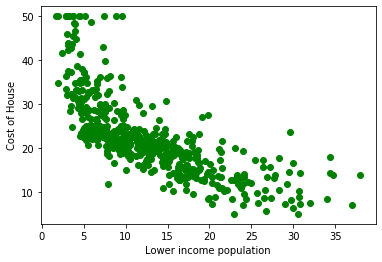

In [10]:
%matplotlib inline
plt.scatter(data, target , color = 'green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(data , target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
pred = reg.predict(data)

In [13]:
pred

array([[29.8225951 ],
       [25.87038979],
       [30.72514198],
       [31.76069578],
       [29.49007782],
       [29.60408375],
       [22.74472741],
       [16.36039575],
       [ 6.11886372],
       [18.30799693],
       [15.1253316 ],
       [21.94668596],
       [19.62856553],
       [26.70643322],
       [24.80633451],
       [26.50692285],
       [28.30251613],
       [20.61661686],
       [23.44776393],
       [23.83728417],
       [14.58380346],
       [21.41465832],
       [16.76891698],
       [15.66685973],
       [19.06803641],
       [18.86852605],
       [20.48360995],
       [18.13698805],
       [22.39320915],
       [23.17224962],
       [13.08272548],
       [22.16519731],
       [ 8.22797329],
       [17.12043524],
       [15.22983702],
       [25.35736314],
       [23.71377775],
       [26.22190805],
       [24.92984093],
       [30.44962767],
       [32.67274316],
       [29.95560201],
       [29.03405413],
       [27.48547369],
       [25.48086955],
       [24

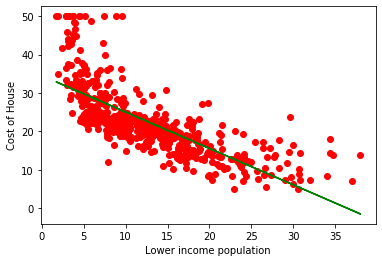

In [15]:
%matplotlib inline
plt.scatter(data, target , color = 'red')
plt.plot(data, pred , color = 'green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [16]:
from sklearn.linear_model import Lasso

In [17]:
from sklearn.linear_model import Ridge

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [27]:
model = make_pipeline(PolynomialFeatures(3), reg)

In [28]:
model.fit(data, target)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [29]:
pred = model.predict(data)

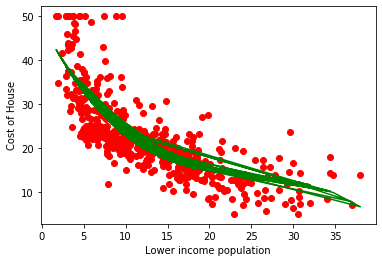

In [30]:
%matplotlib inline
plt.scatter(data, target , color = 'red')
plt.plot(data, pred , color = 'green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(pred,target)

0.4798911810275662

In [33]:
from sklearn.linear_model import Lasso
l1 = Lasso()
l1.fit(data , target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
pred1 = l1.predict(data)

In [42]:
pred1

array([29.67182946, 25.8013627 , 30.55571009, 31.56984682, 29.34618923,
       29.45783731, 22.74034451, 16.48805205,  6.45833289, 18.39537341,
       15.27853118, 21.95880795, 19.68863033, 26.62011528, 24.75931395,
       26.42473114, 28.1831884 , 20.65624702, 23.428841  , 23.81030528,
       14.74820281, 21.43778358, 16.88812433, 15.80885956, 19.13969394,
       18.9443098 , 20.52599093, 18.22790129, 22.39609627, 23.15902481,
       13.27816976, 22.17280011,  8.52382236, 17.23237258, 15.38087526,
       25.29894634, 23.68935319, 26.14561094, 24.88026604, 30.2858939 ,
       32.46303145, 29.80208555, 28.89959691, 27.38304383, 25.41989842,
       24.80583399, 21.14005537, 16.81369228,  5.6395803 , 19.23273401,
       21.79133583, 25.5315465 , 29.39270926, 26.46194717, 20.53529494,
       29.82999757, 28.93681294, 30.63014214, 27.92267621, 25.72693064,
       22.07045603, 20.87023918, 28.0436283 , 25.46641846, 26.81549942,
       29.96025367, 24.77792197, 26.76897939, 22.12628007, 26.12

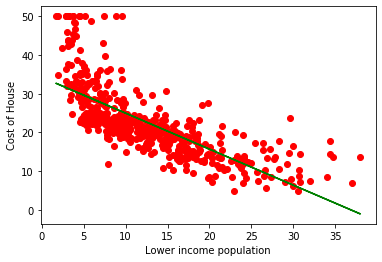

In [43]:
%matplotlib inline
plt.scatter(data, target , color = 'red')
plt.plot(data, pred1 , color = 'green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()

In [40]:
from sklearn.linear_model import Lasso
r1 = Ridge()
r1.fit(data , target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [44]:
pred2 = r1.predict(data)

In [45]:
pred2

array([[29.82231204],
       [25.87026019],
       [30.72482388],
       [31.76033746],
       [29.48980767],
       [29.60380917],
       [22.74471918],
       [16.36063543],
       [ 6.11950107],
       [18.30816098],
       [15.12561923],
       [21.94670871],
       [19.6286783 ],
       [26.70627116],
       [24.80624623],
       [26.50676854],
       [28.30229209],
       [20.61669127],
       [23.44772841],
       [23.83723352],
       [14.58411212],
       [21.41470173],
       [16.76914079],
       [15.66712633],
       [19.06817095],
       [18.86866833],
       [20.48368952],
       [18.13715874],
       [22.39321457],
       [23.17222479],
       [13.08309243],
       [22.16521158],
       [ 8.22852874],
       [17.1206454 ],
       [15.2301206 ],
       [25.35725346],
       [23.7137319 ],
       [26.2217648 ],
       [24.92974785],
       [30.44932026],
       [32.67234943],
       [29.95531378],
       [29.03380169],
       [27.48528138],
       [25.48075508],
       [24

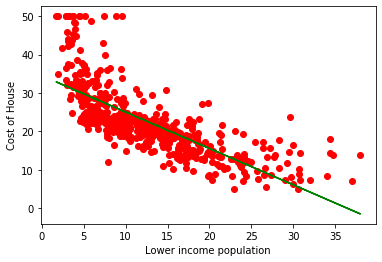

In [46]:
%matplotlib inline
plt.scatter(data, target , color = 'red')
plt.plot(data, pred2 , color = 'green')
plt.xlabel('Lower income population')
plt.ylabel('Cost of House')
plt.show()